<a href="https://colab.research.google.com/github/Nesjesramrey/Modulo-4/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
from scipy import stats

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SpotifyFeatures.csv", encoding="ISO-8859-1")

In [ ]:
df.head()

genre       artist_name  ... time_signature valence
0  Movie    Henri Salvador  ...         04-abr   0.814
1  Movie  Martin  les fées  ...         04-abr   0.816
2  Movie   Joseph Williams  ...         05-abr   0.368
3  Movie    Henri Salvador  ...         04-abr   0.227
4  Movie      Fabien Nataf  ...         04-abr   0.390

[5 rows x 18 columns]

In [ ]:
df.shape

(232725, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232722 non-null  object 
 3   track_id          232523 non-null  object 
 4   popularity        232523 non-null  float64
 5   acousticness      232523 non-null  float64
 6   danceability      232523 non-null  float64
 7   duration_ms       232523 non-null  float64
 8   energy            232523 non-null  float64
 9   instrumentalness  232523 non-null  float64
 10  key               232523 non-null  object 
 11  liveness          232523 non-null  float64
 12  loudness          232523 non-null  float64
 13  mode              232523 non-null  object 
 14  speechiness       232523 non-null  float64
 15  tempo             232523 non-null  float64
 16  time_signature    23

In [ ]:
df.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [ ]:
df.nunique()

genre                   27
artist_name          14555
track_name          146414
track_id            176597
popularity             101
acousticness          4734
danceability          1295
duration_ms          70703
energy                2517
instrumentalness      5400
key                      7
liveness              1732
loudness             27880
mode                     2
speechiness           1641
tempo                78455
time_signature           5
valence               1692
dtype: int64

In [ ]:
df.isna()

genre  artist_name  track_name  ...  tempo  time_signature  valence
0       False        False       False  ...  False           False    False
1       False        False       False  ...  False           False    False
2       False        False       False  ...  False           False    False
3       False        False       False  ...  False           False    False
4       False        False       False  ...  False           False    False
...       ...          ...         ...  ...    ...             ...      ...
232720  False        False       False  ...  False           False    False
232721  False        False       False  ...  False           False    False
232722  False        False       False  ...  False           False    False
232723  False        False       False  ...  False           False    False
232724  False        False       False  ...  False           False    False

[232725 rows x 18 columns]

In [ ]:
df.isna().sum(axis=0)

genre                 0
artist_name           0
track_name            3
track_id            202
popularity          202
acousticness        202
danceability        202
duration_ms         202
energy              202
instrumentalness    202
key                 202
liveness            202
loudness            202
mode                202
speechiness         202
tempo               202
time_signature      202
valence             202
dtype: int64

In [ ]:
df.isna().sum(axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
232720    0
232721    0
232722    0
232723    0
232724    0
Length: 232725, dtype: int64

In [ ]:
df.isnull().any()

genre               False
artist_name         False
track_name           True
track_id             True
popularity           True
acousticness         True
danceability         True
duration_ms          True
energy               True
instrumentalness     True
key                  True
liveness             True
loudness             True
mode                 True
speechiness          True
tempo                True
time_signature       True
valence              True
dtype: bool

In [ ]:
def transforma_ms(numeros):
  return numeros/60/1000

In [ ]:
minutos = list(map(transforma_ms, df['duration_ms']))

In [ ]:
df['minutes'] = minutos

In [ ]:
spot = df.drop(columns=['duration_ms','key','track_id', 'mode', 'time_signature'])


In [ ]:
spotify_clean = spot.dropna(axis=0, how='any')

In [ ]:
spotify_clean.head()

genre       artist_name  ... valence   minutes
0  Movie    Henri Salvador  ...   0.814  1.656217
1  Movie  Martin  les fées  ...   0.816  2.289550
2  Movie   Joseph Williams  ...   0.368  2.837783
3  Movie    Henri Salvador  ...   0.227  2.540450
4  Movie      Fabien Nataf  ...   0.390  1.377083

[5 rows x 14 columns]

In [ ]:
spotify_clean.to_csv("/content/drive/MyDrive/Spotify_Clean.csv")

In [ ]:
spotify_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232521 entries, 0 to 232724
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232521 non-null  object 
 1   artist_name       232521 non-null  object 
 2   track_name        232521 non-null  object 
 3   popularity        232521 non-null  float64
 4   acousticness      232521 non-null  float64
 5   danceability      232521 non-null  float64
 6   energy            232521 non-null  float64
 7   instrumentalness  232521 non-null  float64
 8   liveness          232521 non-null  float64
 9   loudness          232521 non-null  float64
 10  speechiness       232521 non-null  float64
 11  tempo             232521 non-null  float64
 12  valence           232521 non-null  float64
 13  minutes           232521 non-null  float64
dtypes: float64(11), object(3)
memory usage: 26.6+ MB


In [ ]:
spotify_clean.isnull().any()

genre               False
artist_name         False
track_name          False
popularity          False
acousticness        False
danceability        False
energy              False
instrumentalness    False
liveness            False
loudness            False
speechiness         False
tempo               False
valence             False
minutes             False
dtype: bool

In [ ]:
print(f'La media de popularidad es: {spotify_clean.popularity.mean()}')
print(f'La media de acustica es: {spotify_clean.acousticness.mean()}')
print(spotify_clean['danceability'].mean())
print(spotify_clean['energy'].mean())
print(spotify_clean['liveness'].mean())
print(spotify_clean['loudness'].mean())
print(spotify_clean['speechiness'].mean())

La media de popularidad es: 41.1354114252046
La media de acustica es: 0.3683859835757603
0.5544169834122588
0.5710734715943993
0.21493362380172695
9.567165671057449
0.12079857260204632


In [ ]:
spotify_clean['popularity'].median()

43.0

In [ ]:
spotify_clean['popularity'].std()

18.18731081582105

In [ ]:
stats.trim_mean(spotify_clean['popularity'], 0.1)

41.948166027836166

In [ ]:
spotify_clean['popularity'].max() - spotify_clean['popularity'].min()

100.0

In [ ]:
spotify_clean['popularity'].quantile(0.8)

57.0

In [ ]:
print(f'Valor mínimo: {spotify_clean["popularity"].min()}')
print(f'Percentil 10: {spotify_clean["popularity"].quantile(0.1)}')
print(f'Percentil 25: {spotify_clean["popularity"].quantile(0.25)}')
print(f'Percentil 50: {spotify_clean["popularity"].median()}')
print(f'Percentil 75: {spotify_clean["popularity"].quantile(0.75)}')
print(f'Percentil 90: {spotify_clean["popularity"].quantile(0.9)}')
print(f'Valor máximo: {spotify_clean["popularity"].max()}')

Valor mínimo: 0.0
Percentil 10: 15.0
Percentil 25: 29.0
Percentil 50: 43.0
Percentil 75: 55.0
Percentil 90: 63.0
Valor máximo: 100.0


In [ ]:
spotify_clean["popularity"].quantile(0.75) - spotify_clean["popularity"].quantile(0.25)

26.0

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import skew, kurtosis

In [ ]:
sns.set(style='dark')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


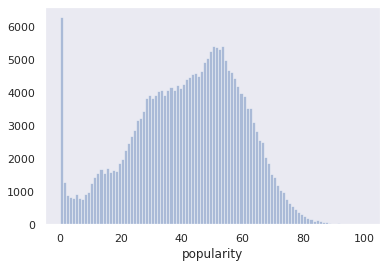

In [ ]:
sns.distplot(spotify_clean['popularity'], kde=False, norm_hist=False, bins=100)

In [ ]:
print(f'Curtosis: {kurtosis(spotify_clean.popularity)}')
print(f'Asimetría: {skew(spotify_clean.popularity)}')

Curtosis: -0.40085017373068776
Asimetría: -0.336478385365961


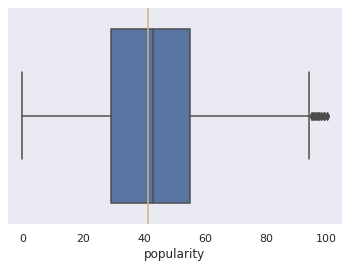

In [ ]:
sns.boxplot(x=spotify_clean['popularity'])
plt.axvline(spotify_clean['popularity'].mean(), c='y')

In [ ]:
iqr = spotify_clean['popularity'].quantile(0.75) - spotify_clean['popularity'].quantile(0.25)
filtro_inferior = spotify_clean['popularity'] > spotify_clean['popularity'].quantile(0.25) - (iqr * 1.5)
filtro_superior = spotify_clean['popularity'] < spotify_clean['popularity'].quantile(0.75) + (iqr * 1.5)

spotify_clean_filtrado = spotify_clean[filtro_inferior & filtro_superior]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


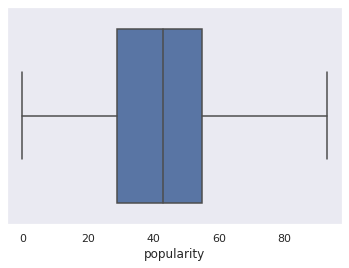

In [ ]:
sns.boxplot(spotify_clean_filtrado['popularity'])

In [ ]:
spotify_clean['popularity'].groupby(pd.cut(spotify_clean['popularity'], 10)).count()

popularity
(-0.1, 10.0]     15738
(10.0, 20.0]     16636
(20.0, 30.0]     31731
(30.0, 40.0]     40951
(40.0, 50.0]     47907
(50.0, 60.0]     47028
(60.0, 70.0]     24971
(70.0, 80.0]      6570
(80.0, 90.0]       882
(90.0, 100.0]      107
Name: popularity, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


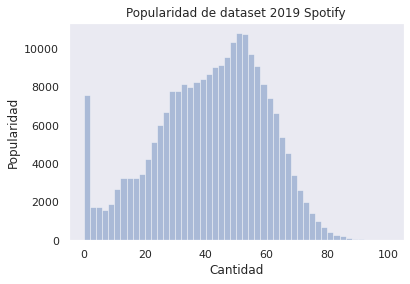

In [ ]:
ax = sns.distplot(spotify_clean['popularity'], kde=False, norm_hist=False)
ax.set(title='Popularidad de dataset 2019 Spotify', xlabel='Cantidad', ylabel='Popularidad');

In [ ]:
by_song = spotify_clean.groupby(level=0)[['popularity']].mean()
genre = spotify_clean.groupby(level=0)['genre'].last()
merged = by_song.merge(genre, left_index=True, right_index=True)
rock = by_song[merged['genre'] == 'Rock']
pop = by_song[merged['genre'] == 'Pop']
classical = by_song[merged['genre'] == 'Classical']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

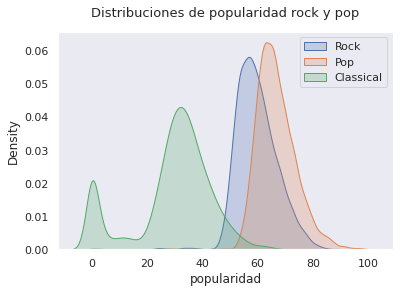

In [ ]:
ax = sns.distplot(rock['popularity'], hist=False, kde_kws = {'shade': True}, label='Rock')
sns.distplot(pop['popularity'], hist=False, kde_kws = {'shade': True}, ax=ax, label='Pop')
sns.distplot(classical['popularity'], hist=False, kde_kws = {'shade': True}, ax=ax, label='Classical')
ax.set_title('Distribuciones de popularidad rock y pop', fontsize=13, pad=15);
ax.set(xlabel='popularidad');
ax.legend(loc='upper right');

In [ ]:
by_song_2 = spotify_clean.groupby(level=0)[['popularity']].mean()
artist_name = spotify_clean.groupby(level=0)['artist_name'].last()
merged_2 = by_song_2.merge(artist_name, left_index=True, right_index=True)
beatles = by_song_2[merged_2['artist_name'] == 'The Beatles']
rolling = by_song_2[merged_2['artist_name'] == 'The Rolling Stones']
ariana = by_song_2[merged_2['artist_name'] == 'Ariana Grande']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

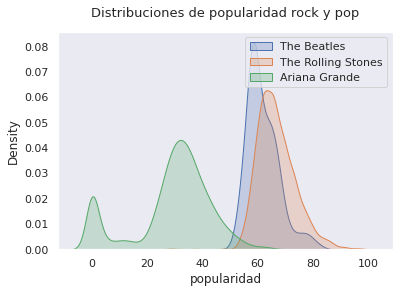

In [ ]:
ax = sns.distplot(beatles['popularity'], hist=False, kde_kws = {'shade': True}, label='The Beatles')
sns.distplot(pop['popularity'], hist=False, kde_kws = {'shade': True}, ax=ax, label='The Rolling Stones')
sns.distplot(classical['popularity'], hist=False, kde_kws = {'shade': True}, ax=ax, label='Ariana Grande')
ax.set_title('Distribuciones de popularidad rock y pop', fontsize=13, pad=15);
ax.set(xlabel='popularidad');
ax.legend(loc='upper right');

In [ ]:
spotify_clean['genre'].unique()


array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children\x92s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [ ]:
spotify_clean['genre'].value_counts()

Comedy              9678
Soundtrack          9645
Indie               9542
Jazz                9428
Pop                 9384
Electronic          9374
Childrens Music    9352
Hip-Hop             9295
Folk                9291
Alternative         9262
Rock                9251
Classical           9241
Rap                 9231
World               9096
Soul                9081
R&B                 8989
Blues               8979
Anime               8931
Reggaeton           8925
Ska                 8872
Reggae              8769
Dance               8696
Country             8661
Opera               8247
Movie               7788
Children's Music    5394
A Capella            119
Name: genre, dtype: int64

In [ ]:
count_genre = spotify_clean['genre'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


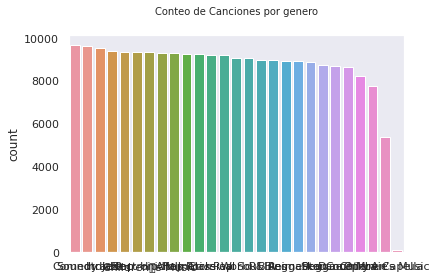

In [ ]:
ax = sns.barplot(count_genre.index, count_genre)
ax.set_title('Conteo de Canciones por genero', fontsize=10, pad=20)
ax.set(ylabel='count');

In [ ]:
spotify_clean['genre'].mode()

0    Comedy
dtype: object

In [ ]:
spotify_clean.sort_values('popularity')

genre            artist_name  ... valence   minutes
0                  Movie         Henri Salvador  ...   0.814  1.656217
74283   Children's Music        Mogul Music Inc  ...   0.860  2.616600
74282   Children's Music  Kimbo Childrens Music  ...   0.597  1.638450
74281   Children's Music  Kimbo Childrens Music  ...   0.666  2.212450
74280   Children's Music  Kimbo Childrens Music  ...   0.932  0.854450
...                  ...                    ...  ...     ...       ...
107802               Pop          Ariana Grande  ...   0.335  3.174000
107803               Pop            Post Malone  ...   0.385  2.492000
86951                Rap            Post Malone  ...   0.385  2.492000
9027               Dance          Ariana Grande  ...   0.319  2.977333
107804               Pop          Ariana Grande  ...   0.319  2.977333

[232521 rows x 14 columns]

In [ ]:
sns.set_palette('Spectral')

In [ ]:
spotify_genre = spotify_clean.groupby(spotify_clean['genre']).count()
print(spotify_genre)

                  artist_name  track_name  popularity  ...  tempo  valence  minutes
genre                                                  ...                         
A Capella                 119         119         119  ...    119      119      119
Alternative              9262        9262        9262  ...   9262     9262     9262
Anime                    8931        8931        8931  ...   8931     8931     8931
Blues                    8979        8979        8979  ...   8979     8979     8979
Children's Music         5394        5394        5394  ...   5394     5394     5394
Childrens Music         9352        9352        9352  ...   9352     9352     9352
Classical                9241        9241        9241  ...   9241     9241     9241
Comedy                   9678        9678        9678  ...   9678     9678     9678
Country                  8661        8661        8661  ...   8661     8661     8661
Dance                    8696        8696        8696  ...   8696     8696  

In [ ]:
spot_count_artist = spotify_clean.groupby(spotify_clean['artist_name']).count()

In [ ]:
print(spot_count_artist)

                genre  track_name  popularity  ...  tempo  valence  minutes
artist_name                                    ...                         
!!!                40          40          40  ...     40       40       40
$NOT                4           4           4  ...      4        4        4
$olal               1           1           1  ...      1        1        1
$teven Cannon       1           1           1  ...      1        1        1
$tupid Young        2           2           2  ...      2        2        2
...               ...         ...         ...  ...    ...      ...      ...
Ñejo  Dalmata      35          35          35  ...     35       35       35
Ólafur Arnalds     50          50          50  ...     50       50       50
Özgür Can           1           1           1  ...      1        1        1
ØDYSSEE             9           9           9  ...      9        9        9
Ørka                1           1           1  ...      1        1        1

[14552 rows

In [ ]:
spot_count_artist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14552 entries, !!! to Ørka
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   genre             14552 non-null  int64
 1   track_name        14552 non-null  int64
 2   popularity        14552 non-null  int64
 3   acousticness      14552 non-null  int64
 4   danceability      14552 non-null  int64
 5   energy            14552 non-null  int64
 6   instrumentalness  14552 non-null  int64
 7   liveness          14552 non-null  int64
 8   loudness          14552 non-null  int64
 9   speechiness       14552 non-null  int64
 10  tempo             14552 non-null  int64
 11  valence           14552 non-null  int64
 12  minutes           14552 non-null  int64
dtypes: int64(13)
memory usage: 1.6+ MB


In [ ]:
spot_count_artist['popularity'].mean()

15.978628367234744

In [ ]:
spot_count_artist.sort_values('popularity')

genre  track_name  popularity  ...  tempo  valence  minutes
artist_name                                           ...                         
Ørka                       1           1           1  ...      1        1        1
Haydn Trio Eisenstadt      1           1           1  ...      1        1        1
Hawthorne Heights          1           1           1  ...      1        1        1
Havana Swing               1           1           1  ...      1        1        1
Havana Brown               1           1           1  ...      1        1        1
...                      ...         ...         ...  ...    ...      ...      ...
Richard Wagner           803         803         803  ...    803      803      803
Nobuo Uematsu            825         825         825  ...    825      825      825
Kimbo Childrens Music    969         969         969  ...    969      969      969
Giacomo Puccini         1137        1137        1137  ...   1137     1137     1137
Giuseppe Verdi          1389        1389        1389  ...   1389     1389     1389

[14552 rows x 13 columns]

In [ ]:
spotify_clean.corr()

popularity  acousticness  ...   valence   minutes
popularity          1.000000     -0.380925  ...  0.059871  0.002641
acousticness       -0.380925      1.000000  ... -0.325751  0.010995
danceability        0.256402     -0.364529  ...  0.547161 -0.125996
energy              0.248533     -0.725433  ...  0.436689 -0.030413
instrumentalness   -0.211073      0.316189  ... -0.307669  0.076063
liveness           -0.168056      0.068975  ...  0.011685  0.023762
loudness           -0.362824      0.690188  ... -0.399946  0.047626
speechiness        -0.151085      0.151074  ...  0.023959 -0.016537
tempo               0.081054     -0.238202  ...  0.134875 -0.028402
valence             0.059871     -0.325751  ...  1.000000 -0.142092
minutes             0.002641      0.010995  ... -0.142092  1.000000

[11 rows x 11 columns]

In [ ]:
df_numeros.to_csv('numeros.csv', header=False, index=False)

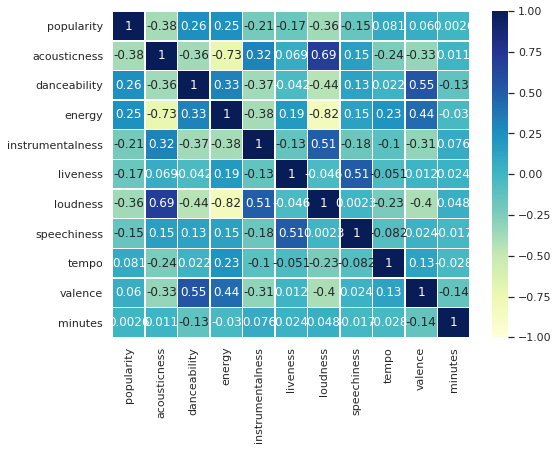

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(spotify_clean.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);


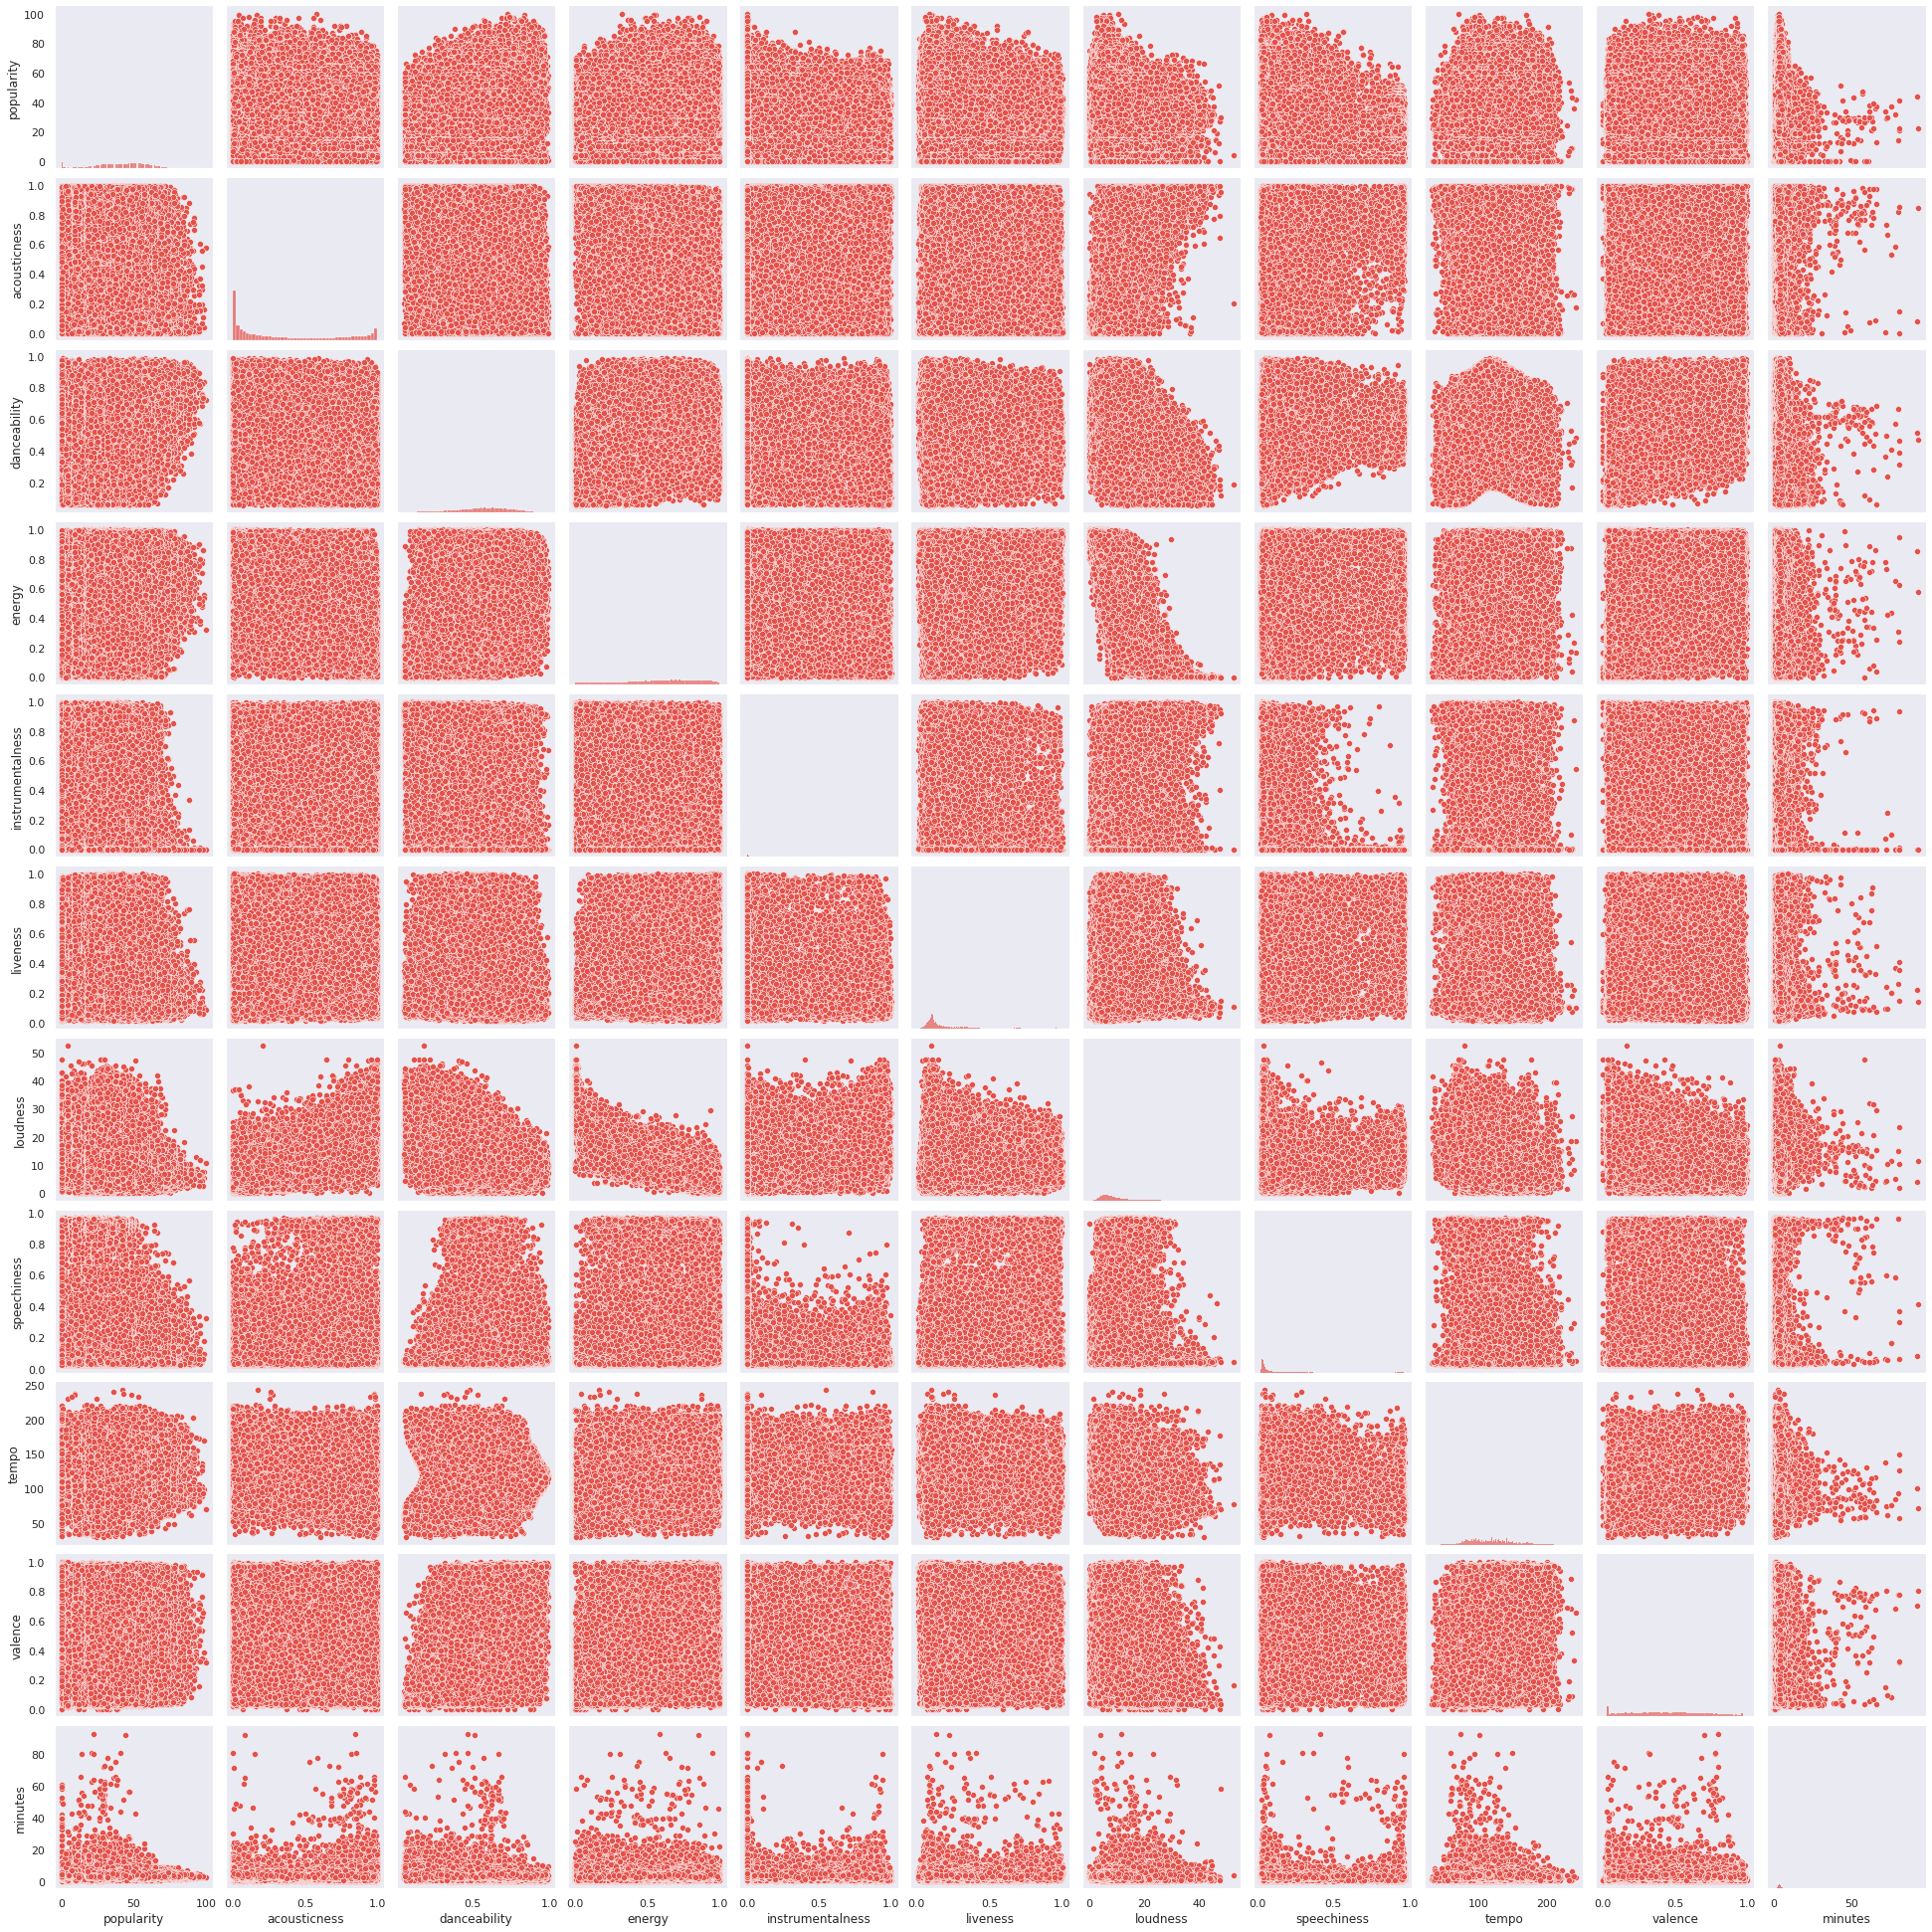

In [ ]:
sns.pairplot(spotify_clean);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


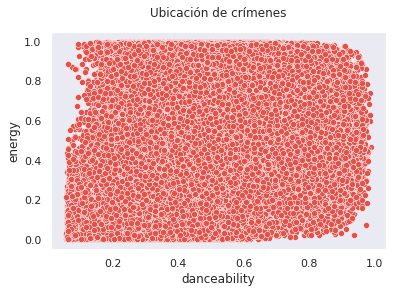

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicación de crímenes', pad=15)
ax.set_xlabel('danceability')
ax.set_ylabel('energy')

sns.scatterplot(spotify_clean['danceability'], spotify_clean['energy'], ax=ax);